C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


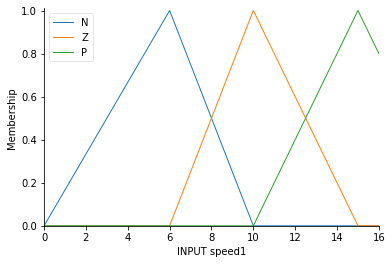

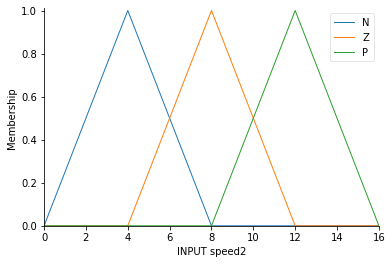

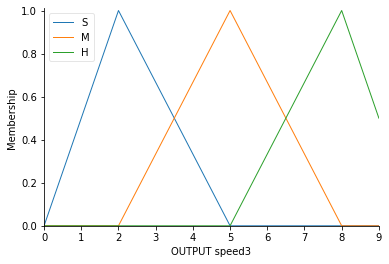

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

speed1 = ctrl.Antecedent(np.arange(0, 17, 1), 'INPUT speed1')
speed2 = ctrl.Antecedent(np.arange(0, 17, 1), 'INPUT speed2')
speed3 = ctrl.Consequent(np.arange(0, 10, 1), 'OUTPUT speed3')

speed1['N'] = fuzz.trimf(speed1.universe, [0, 6, 10])
speed1['Z'] = fuzz.trimf(speed1.universe, [6, 10, 15])
speed1['P'] = fuzz.trimf(speed1.universe, [10, 15, 20])

speed2['N'] = fuzz.trimf(speed2.universe, [0, 4, 8])
speed2['Z'] = fuzz.trimf(speed2.universe, [4, 8, 12])
speed2['P'] = fuzz.trimf(speed2.universe, [8, 12, 16])

speed3['S'] = fuzz.trimf(speed3.universe, [0, 2, 5])
speed3['M'] = fuzz.trimf(speed3.universe, [2, 5, 8])
speed3['H'] = fuzz.trimf(speed3.universe, [5, 8, 10])

speed1.view()
speed2.view()
speed3.view()

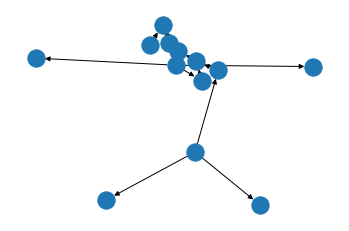

In [2]:
rule1 = ctrl.Rule(speed1['N'] & speed2['N'], speed3['S'])
rule2 = ctrl.Rule(speed1['N'] & speed2['Z'], speed3['M'])
rule3 = ctrl.Rule(speed1['N'] & speed2['P'], speed3['M'])

rule4 = ctrl.Rule(speed1['Z'] & speed2['N'], speed3['M'])
rule5 = ctrl.Rule(speed1['Z'] & speed2['Z'], speed3['H'])
rule6 = ctrl.Rule(speed1['Z'] & speed2['P'], speed3['H'])

rule7 = ctrl.Rule(speed1['P'] & speed2['N'], speed3['M'])
rule8 = ctrl.Rule(speed1['P'] & speed2['Z'], speed3['H'])
rule9 = ctrl.Rule(speed1['P'] & speed2['P'], speed3['H'])

rule1.view()
speed3ping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
speed3ping = ctrl.ControlSystemSimulation(speed3ping_ctrl)
speed3ping.input['INPUT speed1'] = 16
speed3ping.input['INPUT speed2'] = 12


สปีดการหมุน 7.46046511627907


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


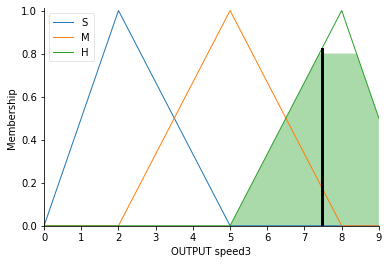

In [3]:
speed3ping.compute()
speed3.view(sim=speed3ping)
print("สปีดการหมุน",speed3ping.output['OUTPUT speed3'])
